### Explore Xsum

In [54]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')    

In [55]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from dataset import Dataset
from torch.utils.data import DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, BartTokenizer, BartForConditionalGeneration, T5Config,BartConfig
import pickle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

In [56]:
model = "t5-small" #"bart-base"
dataset = "xsum"
path = f"{model}_{dataset}_nomask/outputs_{model}_{dataset}/model_files/"

In [57]:
# Load dataset
data = 'xsum'
model = "t5-small" #"bart-base"
if data == 'cnn_dailymail':
    dataset = load_dataset(data, '3.0.0')
    source_text = "article"
    target_text = "highlights"
elif data == "xsum":
    dataset = load_dataset(data)
    source_text = "document"
    target_text = "summary"
else:
    raise ValueError("Undefined dataset")
    
model_params = {
    "MODEL": model,  # model_type: t5-base/t5-large
    "BATCH_SIZE": 1024,  # training batch size
    "MAX_SOURCE_TEXT_LENGTH": 512,  # max length of source text
    "MAX_TARGET_TEXT_LENGTH": 36,  # max length of target text
    "SEED": 42,  # set seed for reproducibility
}

val_dataset = dataset["validation"]
train_dataset = dataset["train"]
test_dataset = dataset["test"]

print("Total training set len: ", len(val_dataset))

if "bart" in model:
    tokenizer = BartTokenizer.from_pretrained(path)
elif "t5" in model:
    tokenizer = T5Tokenizer.from_pretrained(model_params["MODEL"])# just because our Dataset requires it
else:
    pass

# 1        tokenizer = T5Tokenizer.from_pretrained(model_params["MODEL"])
#         model = T5ForConditionalGeneration.from_pretrained(model_params["MODEL"])

train_set = Dataset(
    train_dataset,
    tokenizer,
    model_params["MODEL"],
    model_params["MAX_SOURCE_TEXT_LENGTH"],
    model_params["MAX_TARGET_TEXT_LENGTH"],
    source_text,
    target_text,
)

val_set = Dataset(
    val_dataset,
    tokenizer,
    model_params["MODEL"],
    model_params["MAX_SOURCE_TEXT_LENGTH"],
    model_params["MAX_TARGET_TEXT_LENGTH"],
    source_text,
    target_text,
)

test_set = Dataset(
    test_dataset,
    tokenizer,
    model_params["MODEL"],
    model_params["MAX_SOURCE_TEXT_LENGTH"],
    model_params["MAX_TARGET_TEXT_LENGTH"],
    source_text,
    target_text,
)
print("Final data top q1 set len: ", len(train_set))
print("Final data top q3 set len: ", len(val_set))

Using custom data configuration default
Reusing dataset xsum (/home/pranisaa/.cache/huggingface/datasets/xsum/default/1.2.0/32c23220eadddb1149b16ed2e9430a05293768cfffbdfd151058697d4c11f934)


  0%|          | 0/3 [00:00<?, ?it/s]

Total training set len:  11332
Final data top q1 set len:  204045
Final data top q3 set len:  11332


In [58]:
params = {
    "batch_size": model_params["BATCH_SIZE"],
    "shuffle": False,
    "num_workers": 0,
}
train_loader = DataLoader(train_set, **params)
val_loader = DataLoader(val_set, **params)
test_loader = DataLoader(test_set, **params)

In [88]:
doc_texts = []
doc_lens = []
target_texts = []
target_lens = []
ids_sum = []
for _, data in enumerate(test_loader, 0):
    print(_,"/",len(test_loader))
    ids = data["ids"]
    ids_sum.extend(ids)
    
    doc_text = data["source_text"]
    doc_len = data["source_len"]
    doc_texts.extend(doc_text)
    doc_lens.extend(doc_len.tolist())
    
    target_text = data["target_text"]
    target_len = data["target_len"]
    target_texts.extend(target_text)
    target_lens.extend(target_len.tolist())


0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12


In [97]:
# dataset['train']['id']

In [100]:
# dataset['train'][dataset['train']['id'] == ['35232142', '36266422']]

In [89]:
dict_ = {'index':[x for x in range(len(ids_sum))],'ids': ids_sum, 'doc text': doc_texts, 'target text': target_texts, 'doc len': doc_lens, 'sum len': target_lens }


In [90]:
df_ = pd.DataFrame.from_dict(dict_)

In [91]:
df_.to_csv('../datalength/test_info.csv', index = True)

In [67]:
# df_ = df_.rename(columns={"":"Index"})

In [83]:
df_.head()

index       ids  \
0      0  35232142   
1      1  40143035   
2      2  35951548   
3      3  36266422   
4      4  38826984   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [77]:
df_ = pd.DataFrame(  dict_, 
                    columns=['Index', 'ids', 'doc text', 'target text','doc len', 'sum len'], index = True)

TypeError: Index(...) must be called with a collection of some kind, True was passed

In [75]:
first_column

0         35232142
1         40143035
2         35951548
3         36266422
4         38826984
            ...   
204040    34084759
204041    40552318
204042    36781065
204043    31579588
204044    35809055
Name: ids, Length: 204045, dtype: object

In [31]:
type(df_.ids[0])

str

In [35]:
type(dataset['train']['id'][0])

str

In [44]:
filtered_train_len = []
for _, data in enumerate(train_loader, 0):
    print(_,"/",len(train_loader))
    if data['ids'] in filtered_id_list:
        print(data['id'])
        len_check = data["target_len"]
        filtered_train_len.extend(len_check.tolist())

0 / 200
['35232142', '40143035', '35951548', '36266422', '38826984', '34540833', '20836172', '35932467', '40758845', '30358490', '34615665', '35890902', '37922330', '30844962', '36217333', '30816523', '38900884', '13890581', '40194700', '37903647', '13291223', '36052570', '34944735', '32159602', '34988915', '37889203', '33609927', '33578778', '36888270', '36846007', '31723471', '15921828', '39109408', '20936833', '36832879', '14958201', '34352262', '39805395', '34303109', '39939090', '29347771', '36783415', '37935687', '40260829', '36478199', '34541803', '35360841', '35550407', '37561590', '39328843', '35389665', '33080187', '38636995', '18536236', '36289151', '23017045', '36418082', '34396551', '39720944', '35884842', '35403375', '26341324', '19212345', '30548367', '37919402', '39995133', '40249088', '40254388', '31995230', '38632129', '35720795', '23906759', '19410108', '30745137', '26553115', '37872311', '35553131', '39038936', '38735486', '17087845', '37443011', '36855749', '356131

KeyboardInterrupt: 

In [26]:
import pickle

# To write
# with open("train_len", "wb") as fp:   #Pickling
#     pickle.dump(train_len, fp)
    
with open('train_len', 'rb') as handle:
    train_len = pickle.load(handle)

Text(0.5, 1.0, 'Histogram of source lengths')

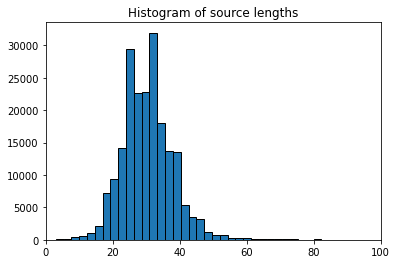

In [17]:
# matplotlib histogram
plt.hist(train_len, edgecolor = 'black',
         bins = 75)
plt.xlim([0,100])
plt.title(f'Histogram of source lengths')

In [107]:
# train_len = np.array(train_len)
# print(len(train_len[train_len<512])/len(train_len))

0.6158641476144968


In [91]:
val_len = []
for _, data in enumerate(val_loader, 0):
    print(_,"/",len(val_loader))
    len_check = data["source_len"]
    val_len.extend(len_check.tolist())

0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12


In [25]:
import pickle

# To WRITE
# with open("val_len", "wb") as fp:   #Pickling
#     pickle.dump(val_len, fp)

# To READ
with open('val_len', 'rb') as handle:
    val_len = pickle.load(handle)


7730
3


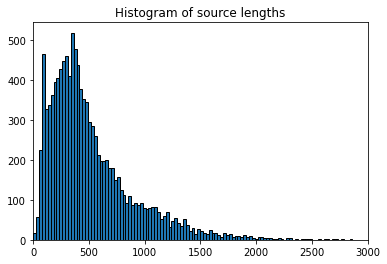

In [19]:
plt.hist(val_len, edgecolor = 'black',
         bins = 300)

plt.title(f'Histogram of source lengths')
plt.xlim([0,3000])
print(max(val_len))
print(min(val_len))

In [87]:
test_len = []
for _, data in enumerate(test_loader, 0):
    print(_,"/",len(test_loader))
    len_check = data["source_len"]
    test_len.extend(len_check.tolist())

0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12


In [24]:
# To WRITE
# with open("test_len", "wb") as fp:   #Pickling
#     pickle.dump(test_len, fp)

# To READ
with open('test_len', 'rb') as handle:
    test_len = pickle.load(handle)

15861
3


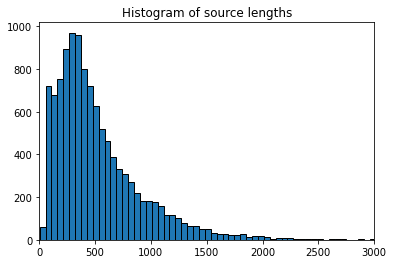

In [22]:
plt.hist(test_len, edgecolor = 'black',
         bins = 300)

plt.title(f'Histogram of source lengths')
plt.xlim([0,3000])
print(max(test_len))
print(min(test_len))

In [28]:
total = []
total.extend(train_len)
total.extend(val_len)
total.extend(test_len)

In [29]:
print("MEAN of TOTAL: ", np.mean(total))
print("MEAN of TRAIN: ", np.mean(train_len))
print("MEAN of VAL: ", np.mean(val_len))
print("MEAN of TEST: ", np.mean(test_len))
train_len = np.array(train_len)
val_len = np.array(val_len)
test_len = np.array(test_len)
print("PERCENT OF TRAIN < 512: ", len(train_len[train_len<512])/len(train_len))
print("PERCENT OF VAL < 512: ", len(val_len[val_len<512])/len(val_len))
print("PERCENT OF TEST < 512: ", len(test_len[test_len<512])/len(test_len))

MEAN of TOTAL:  525.6879551499486
MEAN of TRAIN:  525.9222328407949
MEAN of VAL:  518.6749911754324
MEAN of TEST:  528.4820010587613
PERCENT OF TRAIN < 512:  0.6158641476144968
PERCENT OF VAL < 512:  0.6236321920225909
PERCENT OF TEST < 512:  0.6131109934709723


In [61]:
df = pd.read_csv("../datalength/train_data_length_info.csv")

In [62]:
df.head()

,Unnamed: 0,ids,index,length
0,0,35232142,0,541
1,1,40143035,1,194
2,2,35951548,2,1214
3,3,36266422,3,369
4,4,38826984,4,242


In [63]:
cond1 =  df.length >= 485 
cond2 = df.length <= 512
df_filtered = df[cond1 & cond2]

In [64]:
df_filtered

,Unnamed: 0,ids,index,length
19,19,37903647,19,485
47,47,35550407,47,505
62,62,19212345,62,494
86,86,35862754,86,486
131,131,37049719,131,491
...,...,...,...,...
203927,203927,39170241,203927,492
203984,203984,37193602,203984,495
203990,203990,39289726,203990,494
203999,203999,33958450,203999,487


Text(0.5, 1.0, 'Histogram of source lengths')

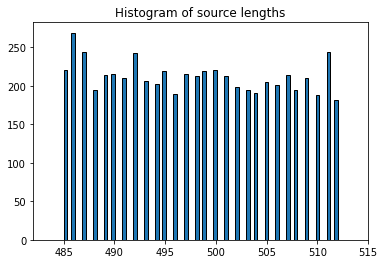

In [65]:
plt.hist(df_filtered['length'], edgecolor = 'black',
         bins = 75)
plt.xlim([482,515])
plt.title(f'Histogram of source lengths')

In [66]:
filtered_id = df_filtered['ids']

In [76]:
len(filtered_id)

5927

In [49]:
filtered_id_list = str(filtered_id).to_list())

AttributeError: 'str' object has no attribute 'to_list'

In [67]:
df_sum = pd.read_csv("full_info.csv")

In [69]:
cond1 = df_sum['doc len'] >= 485 
cond2 = df_sum['doc len'] <= 512
df_new = df_sum[cond1& cond2]

In [70]:
df_new

,ids,doc len,sum len
19,37903647,485,39
47,35550407,505,22
62,19212345,494,31
86,35862754,486,27
131,37049719,491,30
...,...,...,...
203927,39170241,492,27
203984,37193602,495,36
203990,39289726,494,26
203999,33958450,487,27


In [71]:
sum_len = df_new['sum len']

Text(0.5, 1.0, 'Histogram of source lengths')

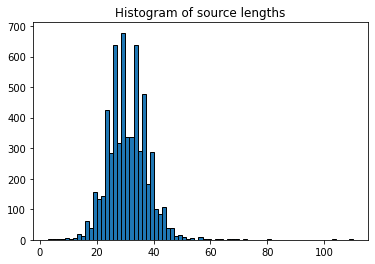

In [74]:
plt.hist(sum_len, edgecolor = 'black',
         bins = 75)
# plt.xlim([20,40])
plt.title(f'Histogram of source lengths')

In [75]:
len(sum_len)

5927

In [103]:
path_train = "../datalength/test_info.csv"
df_train = pd.read_csv(path_train)


# less than n input tokens
traincond1 = df_train["doc len"] >= 495
traincond2 = df_train["doc len"] <= 512
index_train = df_train['index'][traincond1 & traincond2]
index_train

10          10
73          73
78          78
90          90
175        175
         ...  
11122    11122
11142    11142
11204    11204
11279    11279
11331    11331
Name: index, Length: 225, dtype: int64

In [113]:
dataset['test'][index_train]['id']

['32300397',
 '37427024',
 '36269210',
 '36369346',
 '40255148',
 '38316455',
 '36555197',
 '34043497',
 '39988875',
 '40726833',
 '37465648',
 '39343514',
 '35564269',
 '33155793',
 '33577840',
 '38955991',
 '32886647',
 '39179212',
 '32495927',
 '35895586',
 '34196691',
 '37228741',
 '34358020',
 '37570670',
 '27660683',
 '34265094',
 '32919712',
 '28538337',
 '40260319',
 '36279605',
 '40625678',
 '17852576',
 '33682155',
 '31076194',
 '40342666',
 '34106214',
 '28226775',
 '31529663',
 '40924307',
 '31421607',
 '33491507',
 '39443663',
 '37245812',
 '40870428',
 '39922085',
 '29723792',
 '33826653',
 '35956182',
 '38679324',
 '37873344',
 '26668081',
 '39563495',
 '35333277',
 '39040196',
 '36445024',
 '37541121',
 '32327964',
 '40568607',
 '13748042',
 '30346384',
 '33681460',
 '39526414',
 '32304414',
 '30555220',
 '35773812',
 '40246994',
 '39831596',
 '34418595',
 '37215189',
 '40886418',
 '35297395',
 '12325285',
 '39435586',
 '22071055',
 '39665956',
 '35111636',
 '33051905',